# Ex06 - Introdução ao OpenGL

Nesta atividade, vocês vão exercitar os primeiros conceitos de OpenGL. Para evitar erros de execução, utilize apenas uma célula de código para cada parte desta atividade.

### Parte 1 - Renderização de objetos simples

Crie um programa que reproduza uma imagem semelhante à imagem abaixo (triângulos nos cantos e um quadrado no centro). O tamanho e cor dos objetos e a cor do background é livre, mas as arestas dos triângulos devem estar coladas nos cantos da janela. Você pode usar como base os notebooks notebook ([17_Primeiro_programa_OpenGL](17_Primeiro_programa_OpenGL.ipynb)), ([18_Configurando_uma_cor_unica_para_todos_os_vertices](18_Configurando_uma_cor_unica_para_todos_os_vertices.ipynb)) e ([19_Renderizando_mais_de_um_objeto](19_Renderizando_mais_de_um_objeto.ipynb)).

![title](cg/images/ex6_image.png)

In [4]:
import numpy as np
import OpenGL.GL as gl
from PyQt5 import QtOpenGL
from PyQt5.QtWidgets import QApplication

from cg.shader_programs.SimpleShaderProgram_v1 import SimpleShaderProgram
from cg.renderers.ModelRenderer_v1 import ModelRenderer

class MyWidget(QtOpenGL.QGLWidget):
    def initializeGL(self):
        
        # posição de cada vértice dos triângulos
        vertex_position_01 = np.array([ # Triangle 1
            -1.00, -1.00, 0.0, 1.0, 
            -0.60, -1.00, 0.0, 1.0,
            -1.00, -0.60, 0.0, 1.0],
            dtype = np.float32)
        vertex_position_02 = np.array([ # Triangle 2
             1.00,  1.00, 0.0, 1.0, 
             0.60,  1.00, 0.0, 1.0,
             1.00,  0.60, 0.0, 1.0],
            dtype=np.float32)
        vertex_position_03 = np.array([ # Triangle 3
            -0.20,  0.20, 0.0, 1.0,
             0.20,  0.20, 0.0, 1.0,
            -0.20, -0.20, 0.0, 1.0],
            dtype = np.float32)
        vertex_position_04 = np.array([ # Triangle 4
             0.20, -0.20, 0.0, 1.0,
             0.20,  0.20, 0.0, 1.0,
            -0.20, -0.20, 0.0, 1.0],
            dtype = np.float32)
        
        # cor de cada vértice dos triângulos
        #vertex_color = np.array([
         #   1.0, 0.0, 0.0, 1.0, # Triângulo 1
          #  0.0, 1.0, 0.0, 1.0,
           # 0.0, 0.0, 1.0, 1.0,
            #1.0, 0.0, 0.0, 1.0, # Triângulo 2
            #0.0, 1.0, 0.0, 1.0,
            #0.0, 0.0, 1.0, 1.0],
            #dtype=np.float32)
        
        # cria um objeto responsável por carregar os dados para a GPU e renderizá-los
        self.triangleRenderer01 = ModelRenderer(vertex_position_01)
        self.triangleRenderer02 = ModelRenderer(vertex_position_02)
        self.triangleRenderer03 = ModelRenderer(vertex_position_03)
        self.triangleRenderer04 = ModelRenderer(vertex_position_04)
        
        # cria um shader program simples
        self.shaderProgram = SimpleShaderProgram()
        
        # ativa o shader programa para permitir configurar uma cor única para todos os vértices
        self.shaderProgram.bind()
        self.shaderProgram.useUniformColor(True)
        self.shaderProgram.release()

        # recupera os endereços das variáveis de entrada do shader program
        position_loc = self.shaderProgram.getVertexPositionLoc()
        #color_loc = self.shaderProgram.getVertexColorLoc()
        
        # configura os dados do modelo para serem os dados de entrada do shader program
        self.triangleRenderer01.setVertexPositionLoc(position_loc)
        #self.triangleRenderer01.setVertexColorLoc(color_loc)
        self.triangleRenderer02.setVertexPositionLoc(position_loc)
        #self.triangleRenderer02.setVertexColorLoc(color_loc)
        self.triangleRenderer03.setVertexPositionLoc(position_loc)
        self.triangleRenderer04.setVertexPositionLoc(position_loc)
        
    def paintGL(self):
        
        # configura a cor de background
        gl.glClearColor(1, 1, 1, 1)
        
        # limpa o background com a cor especificada
        gl.glClear(gl.GL_COLOR_BUFFER_BIT)
        
        # ativa o shader program que será executado pela GPU
        self.shaderProgram.bind()
        
        # configura a cor do primeiro triângulo
        self.shaderProgram.setUniformColor(np.array([0.0, 0.0, 0.5, 1.0], dtype=np.float32))
        
        # renderiza o primeiro triângulo
        self.triangleRenderer01.render()
        
        #configura a cor do segundo triângulo
        self.shaderProgram.setUniformColor(np.array([0.5, 0.0, 0.0, 1.0], dtype=np.float32))
        
        # renderiza o segundo triângulo
        self.triangleRenderer02.render()
        
        self.shaderProgram.setUniformColor(np.array([0.0, 0.5, 0.0, 1.0], dtype=np.float32))
        self.triangleRenderer03.render()
        self.shaderProgram.setUniformColor(np.array([0.0, 0.5, 0.0, 1.0], dtype=np.float32))
        self.triangleRenderer04.render()
        
        # desativa o shader program
        self.shaderProgram.release()
        
        # solicita que o método paintGL seja chamado novamente
        self.update()

    def resizeGL(self, width, height):
        
        # atualiza a área de renderização para ser a janela inteira
        gl.glViewport(0, 0, width, height)

def main():
    import sys

    #Criação de um aplicativo Qt
    app = QApplication(sys.argv)

    #Especificação do contexto OpenGL
    glformat = QtOpenGL.QGLFormat()
    glformat.setVersion(3, 3)
    glformat.setDoubleBuffer(True)
    glformat.setProfile(QtOpenGL.QGLFormat.CoreProfile)
    
    #Criação da janela de renderização
    w = MyWidget(glformat)
    w.resize(640, 480)
    w.setWindowTitle('Exercise 1')
    w.show()
    
    sys.exit(app.exec_())

if __name__ == '__main__':
    main()

SystemExit: 0

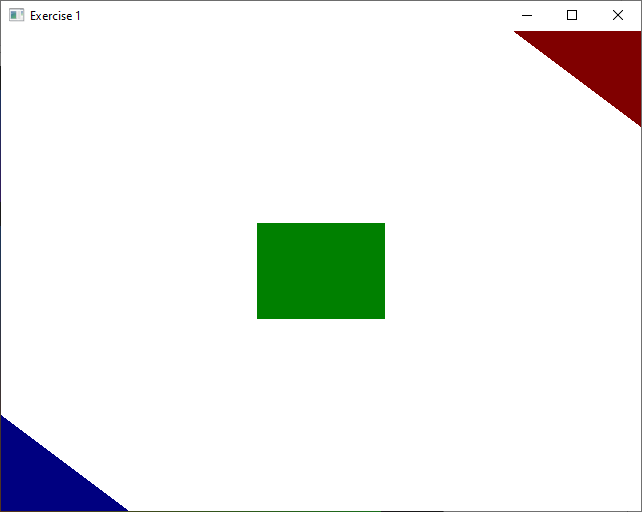

### Parte 2 - Animação

Crie um programa que tenha um objeto (triângulo, quadrado, etc) desenhado no centro, e que as cores deste objeto e do background mudam ao longo do tempo. Você pode usar como base o notebook ([20_Animando_as_cores_dos_triangulos](20_Animando_as_cores_dos_triangulos.ipynb))

In [1]:
import time
import math
import numpy as np
import OpenGL.GL as gl
from PyQt5 import QtOpenGL
from PyQt5.QtWidgets import QApplication

from cg.shader_programs.SimpleShaderProgram_v1 import SimpleShaderProgram
from cg.renderers.ModelRenderer_v1 import ModelRenderer

class MyWidget(QtOpenGL.QGLWidget):
    
    def initializeGL(self):
        
        # posição de cada vértice do primeiro triângulos
        vertex_position_01 = np.array([
            -0.50, -0.50, 0.0, 1.0, # Triângulo 1
             0.50, -0.50, 0.0, 1.0,
            -0.50,  0.50, 0.0, 1.0],
            dtype=np.float32)
        
        # posição de cada vértice do segundo triângulos
        vertex_position_02 = np.array([
             0.50, -0.50, 0.0, 1.0, # Triângulo 2
             0.50,  0.50, 0.0, 1.0,
            -0.50,  0.50, 0.0, 1.0],
            dtype=np.float32)
        
        # cria para cada triângulo um objeto responsável por carregar os dados para a GPU e renderizá-los
        self.triangleRenderer01 = ModelRenderer(vertex_position_01)
        self.triangleRenderer02 = ModelRenderer(vertex_position_02)
        
        # cria um shader program simples
        self.shaderProgram = SimpleShaderProgram()
        
        # ativa o shader programa para permitir configurar uma cor única para todos os vértices
        self.shaderProgram.bind()
        self.shaderProgram.useUniformColor(True)
        self.shaderProgram.release()

        # recupera o endereços da variável de entrada do shader program
        position_loc = self.shaderProgram.getVertexPositionLoc()
        
        # configura os dados do modelo para serem os dados de entrada do shader program
        self.triangleRenderer01.setVertexPositionLoc(position_loc)
        self.triangleRenderer02.setVertexPositionLoc(position_loc)

        # armazena o momento que o programa começou
        self.startTime = time.time()
        
    def paintGL(self):
        
        # configura a cor de background
        #gl.glClearColor(0, 0, 0, 1)
        
        # limpa o background com a cor especificada
        #gl.glClear(gl.GL_COLOR_BUFFER_BIT)
        
        # calcula o tempo de execução do programa
        self.currentTime = time.time()
        time_difference = self.currentTime - self.startTime
        
        # calcula o fator de interpolação
        interpolation_factor = (math.sin(time_difference) + 1) / 2
        
        color_01 = np.array([0.0, 1.0, 0.0, 1.0], dtype=np.float32)
        color_02 = np.array([0.0, 0.0, 0.0, 1.0], dtype=np.float32)
        
        #calcula a nova cor de cada triângulo
        mixed_color_01 = interpolation_factor * color_01 + (1 - interpolation_factor) * color_02
        mixed_color_02 = interpolation_factor * color_02 + (1 - interpolation_factor) * color_01
        
        # ativa o shader program que será executado pela GPU
        self.shaderProgram.bind()
        
        # configura a cor de background
        gl.glClearColor(mixed_color_02[0],mixed_color_02[1],mixed_color_02[2],mixed_color_02[3])
        
        # limpa o background com a cor especificada
        gl.glClear(gl.GL_COLOR_BUFFER_BIT)
        
        # configura a cor do primeiro triângulo
        self.shaderProgram.setUniformColor(mixed_color_01)
        
        # renderiza o primeiro triângulo
        self.triangleRenderer01.render()
        
        #configura a cor do segundo triângulo
        self.shaderProgram.setUniformColor(mixed_color_01)
        
        # renderiza o segundo triângulo
        self.triangleRenderer02.render()
        
        # desativa o shader program
        self.shaderProgram.release()
        
        # solicita que o método paintGL seja chamado novamente
        self.update()

    def resizeGL(self, width, height):
        
        # atualiza a área de renderização para ser a janela inteira
        gl.glViewport(0, 0, width, height)

def main():
    import sys

    #Criação de um aplicativo Qt
    app = QApplication(sys.argv)

    #Especificação do contexto OpenGL
    glformat = QtOpenGL.QGLFormat()
    glformat.setVersion(3, 3)
    glformat.setDoubleBuffer(True)
    glformat.setProfile(QtOpenGL.QGLFormat.CoreProfile)
    
    #Criação da janela de renderização
    w = MyWidget(glformat)
    w.resize(640, 480)
    w.setWindowTitle('OpenGL example')
    w.show()
    sys.exit(app.exec_())

if __name__ == '__main__':
    main()

SystemExit: 0

C:\Users\Andre\Anaconda2\envs\EA979\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


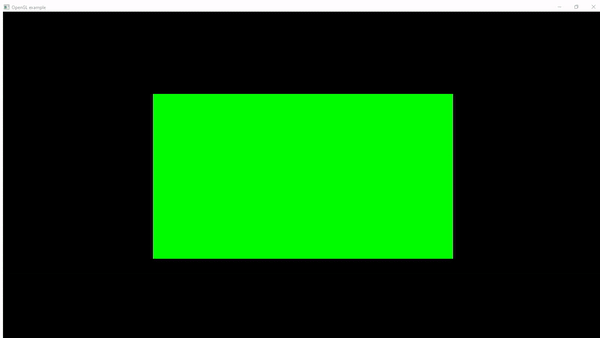

### Parte 3 - Evento de teclado

Crie um programa que tenha um objeto (triângulo, quadrado, etc) desenhado e utilize a setas do teclado para deslocar este objeto na janela. O objeto deve se deslocar na direção da teclada pressionada. Você pode usar como base o notebook ([24_Eventos_do_teclado.ipynb](24_Eventos_do_teclado.ipynb))

In [17]:
import numpy as np
import OpenGL.GL as gl
from PyQt5 import QtOpenGL, QtCore
from PyQt5.QtWidgets import QApplication

from cg.shader_programs.SimpleShaderProgram_v1 import SimpleShaderProgram
from cg.renderers.ModelRenderer_v1 import ModelRenderer

class MyWidget(QtOpenGL.QGLWidget):
    def initializeGL(self):
        
        # posição de cada vértice do primeiro triângulos
        vertex_position_01 = np.array([
            -0.25, -0.25, 0.0, 1.0, # Triângulo 1
             0.25, -0.25, 0.0, 1.0,
            -0.25,  0.25, 0.0, 1.0],
            dtype=np.float32)
        
        self.position01 = vertex_position_01
        
        # posição de cada vértice do segundo triângulos
        vertex_position_02 = np.array([
             0.25, -0.25, 0.0, 1.0, # Triângulo 2
             0.25,  0.25, 0.0, 1.0,
            -0.25,  0.25, 0.0, 1.0],
            dtype=np.float32)
        
        self.position02 = vertex_position_02
        
        # cria para cada triângulo um objeto responsável por carregar os dados para a GPU e renderizá-los
        self.triangleRenderer01 = ModelRenderer(self.position01)
        self.triangleRenderer02 = ModelRenderer(self.position02)
        
        # cria um shader program simples
        self.shaderProgram = SimpleShaderProgram()
        
        # ativa o shader programa para permitir configurar uma cor única para todos os vértices
        self.shaderProgram.bind()
        self.shaderProgram.useUniformColor(True)
        self.shaderProgram.release()

        # recupera o endereços da variável de entrada do shader program
        position_loc = self.shaderProgram.getVertexPositionLoc()
        
        # configura os dados do modelo para serem os dados de entrada do shader program
        self.triangleRenderer01.setVertexPositionLoc(position_loc)
        self.triangleRenderer02.setVertexPositionLoc(position_loc)

        self.colorTriangle01 = np.array([0.0, 0.5, 0.5, 1.0], dtype=np.float32)
        self.colorTriangle02 = np.array([0.0, 0.5, 0.5, 1.0], dtype=np.float32)
        
    def paintGL(self):
        
        # configura a cor de background
        gl.glClearColor(0, 0, 0, 1)
        
        # limpa o background com a cor especificada
        gl.glClear(gl.GL_COLOR_BUFFER_BIT | gl.GL_DEPTH_BUFFER_BIT)
        
        # ativa o shader program que será executado pela GPU
        self.shaderProgram.bind()
        
        # configura a cor do primeiro triângulo
        self.shaderProgram.setUniformColor(self.colorTriangle01)
        
        # renderiza o primeiro triângulo
        self.triangleRenderer01.render()
        
        #configura a cor do segundo triângulo
        self.shaderProgram.setUniformColor(self.colorTriangle02)
        
        # renderiza o segundo triângulo
        self.triangleRenderer02.render()
        
        # desativa o shader program
        self.shaderProgram.release()
        
        # solicita que o método paintGL seja chamado novamente
        self.update()

    def resizeGL(self, width, height):
        
        # atualiza a área de renderização para ser a janela inteira
        gl.glViewport(0, 0, width, height)
        
    def keyPressEvent(self, event):
        super(MyWidget, self).keyPressEvent(event)
        
        # passo 
        step = 0.2
        
        # verifica se foi precionada a tecla de seta 'para cima'
        if ((event.key() == (QtCore.Qt.Key_Up)) or (event.key() == (QtCore.Qt.Key_W))):
            self.position01 += [0,0.2,0,0,
                                0,0.2,0,0,
                                0,0.2,0,0]
            self.position02 += [0,0.2,0,0,
                                0,0.2,0,0,
                                0,0.2,0,0]
            self.triangleRenderer01 = ModelRenderer(self.position01)
            self.triangleRenderer02 = ModelRenderer(self.position02)
            position_loc = self.shaderProgram.getVertexPositionLoc()
            self.triangleRenderer01.setVertexPositionLoc(position_loc)
            self.triangleRenderer02.setVertexPositionLoc(position_loc)

        # verifica se foi precionada a tecla de seta 'para baixo'
        elif ((event.key() == (QtCore.Qt.Key_Down)) or (event.key() == (QtCore.Qt.Key_S))):
            self.position01 += [0,-0.2,0,0,
                                0,-0.2,0,0,
                                0,-0.2,0,0]
            self.position02 += [0,-0.2,0,0,
                                0,-0.2,0,0,
                                0,-0.2,0,0]
            self.triangleRenderer01 = ModelRenderer(self.position01)
            self.triangleRenderer02 = ModelRenderer(self.position02)
            position_loc = self.shaderProgram.getVertexPositionLoc()
            self.triangleRenderer01.setVertexPositionLoc(position_loc)
            self.triangleRenderer02.setVertexPositionLoc(position_loc)
        
        # verifica se foi precionada a tecla de seta 'para esquerda'
        elif ((event.key() == (QtCore.Qt.Key_Left)) or (event.key() == (QtCore.Qt.Key_A))):
            self.position01 += [-0.2,0,0,0,
                                -0.2,0,0,0,
                                -0.2,0,0,0]
            self.position02 += [-0.2,0,0,0,
                                -0.2,0,0,0,
                                -0.2,0,0,0]
            self.triangleRenderer01 = ModelRenderer(self.position01)
            self.triangleRenderer02 = ModelRenderer(self.position02)
            position_loc = self.shaderProgram.getVertexPositionLoc()
            self.triangleRenderer01.setVertexPositionLoc(position_loc)
            self.triangleRenderer02.setVertexPositionLoc(position_loc)
        
        # verifica se foi precionada a tecla de seta 'para direita'
        elif ((event.key() == (QtCore.Qt.Key_Right)) or (event.key() == (QtCore.Qt.Key_D))):
            self.position01 += [0.2,0,0,0,
                                0.2,0,0,0,
                                0.2,0,0,0]
            self.position02 += [0.2,0,0,0,
                                0.2,0,0,0,
                                0.2,0,0,0]
            self.triangleRenderer01 = ModelRenderer(self.position01)
            self.triangleRenderer02 = ModelRenderer(self.position02)
            position_loc = self.shaderProgram.getVertexPositionLoc()
            self.triangleRenderer01.setVertexPositionLoc(position_loc)
            self.triangleRenderer02.setVertexPositionLoc(position_loc)

def main():
    import sys

    #Criação de um aplicativo Qt
    app = QApplication(sys.argv)

    #Especificação do contexto OpenGL
    glformat = QtOpenGL.QGLFormat()
    glformat.setVersion(3, 3)
    glformat.setDoubleBuffer(True)
    glformat.setProfile(QtOpenGL.QGLFormat.CoreProfile)
    
    #Criação da janela de renderização
    w = MyWidget(glformat)
    w.resize(640, 480)
    w.setWindowTitle('OpenGL example')
    w.show()
    sys.exit(app.exec_())

if __name__ == '__main__':
    main()

SystemExit: 0

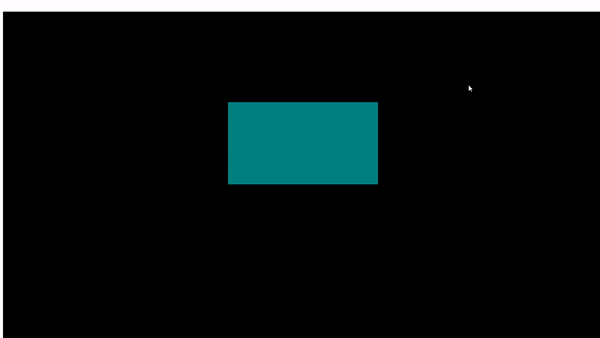